# **W207 Final Project - Facial Keypoints Detection**
# **Baseline model Notebook**

### Period: **Fall 2021 Section 02**
### Team: **Hannah Gross, Anand Patel, Frances Leung, Rumi Nakagawa**

***

# CNN Baseline Notebook

### Dataset: 
https://www.kaggle.com/c/facial-keypoints-detection

### Data Information:
- No duplicate observations.
- No augmentation.
- Output data's missing keypoints will be filled with last valid value in dataset via `ffill`.
- Data is split into training, test, dev, and mini_train segments.

### Baseline CNN Model Information:
- CNN taken from MNIST Fashion Classification.
- Train on train_data (5900 examples).
- Evaluate on test_data & dev_data.
- Loss Function: Mean Squared Error
- Score Metrics: Mean Absolute Error, Accuracy & Root Mean Squared Error

### Baseline CNN Model Performance:
- On `test_data` (1049 examples): loss = 9.8437, mae = 2.1557, accuracy = 0.6139, RMSE = 3.1375
- On `dev_data` (100 examples): loss = 10.0691, mae = 2.3159, accuracy = 0.62, RMSE = 3.1732

***

## Section 1: Import Dependencies and Data
1. Mount drive. 
2. Import EDA and model dependencies.
3. Import training, test and location id data. 

In [ ]:
## 1. Mount drive.
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
## 2. Import EDA and model dependencies.

import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression

# For producing decision tree diagrams.
from IPython.core.display import Image, display

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

%matplotlib inline

In [ ]:
## 3. Import training, test and location id data.

# Import data from google drive.
train_dir = './drive/MyDrive/w207_facial_detection/training.csv'
test_dir = './drive/MyDrive/w207_facial_detection/test.csv'
lookid_dir = './drive/MyDrive/w207_facial_detection/IdLookupTable.csv'

## Import data locally.
# train_dir = './training.csv'
# test_dir = './test.csv'
# lookid_dir = './IdLookupTable.csv'

# Input data into pandas dataframe obj. 
raw_training_data = pd.read_csv(train_dir)  
final_test_data = pd.read_csv(test_dir)
lookid_data = pd.read_csv(lookid_dir)

## Section 2: Initial EDA
1. Confirm there are no duplicates in our raw training data. 
2. Check for NaN values in raw training data. 
3. Preview observations from raw training data.
4. Enumerate EDA findings.


In [ ]:
## 1. Confirm there are no duplicates in our raw training data. 
#    Identical observations in training data may introduce bias and overfitting 
#    in our model.

raw_training_data_no_dups = raw_training_data.drop_duplicates()
dup_count = len(raw_training_data) - len(raw_training_data_no_dups)
print("The raw training data has", dup_count, "duplicate observations.")

The raw training data has 0 duplicate observations.


In [ ]:
## 2. Check for NaN values.
raw_training_data.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [ ]:
# 3. Preview observations from raw training data.
raw_training_data.head().T

,0,1,2,3,4
left_eye_center_x,66.033564,64.332936,65.057053,65.225739,66.725301
left_eye_center_y,39.002274,34.970077,34.909642,37.261774,39.621261
right_eye_center_x,30.227008,29.949277,30.903789,32.023096,32.24481
right_eye_center_y,36.421678,33.448715,34.909642,37.261774,38.042032
left_eye_inner_corner_x,59.582075,58.85617,59.412,60.003339,58.56589
left_eye_inner_corner_y,39.647423,35.274349,36.320968,39.127179,39.621261
left_eye_outer_corner_x,73.130346,70.722723,70.984421,72.314713,72.515926
left_eye_outer_corner_y,39.969997,36.187166,36.320968,38.380967,39.884466
right_eye_inner_corner_x,36.356571,36.034723,37.678105,37.618643,36.98238
right_eye_inner_corner_y,37.389402,34.361532,36.320968,38.754115,39.094852


#### 4. Enumerate EDA Findings.

1. Confirm there are no duplicates in our raw training data. 
    - **There are no identical observations in the training set.** This means observations with the same input and output data. This does not mean that there is no duplicate input data.

2. Check for NaN values.
    - There are many NA values in the training data. Only the image and nose tip is filled for every entry. In order to run a CNN model, our data must be complete. Therefore we must preprocess our dataset to fill in these missing values. At this moment there seem to be 2 main options:
     1. Drop all rows with one or more NaN value.
     2. Fill the missing values:
         - 'ffill' propogates last good value to the missing value.
         - Use semi-supervised learning to fill missing value with predictions from a model.
    - **For our baseline model, we will enact Option 2 with 'ffill'.**

3. Preview observations from raw training data.
    - Currently our training data is consists of a long string of pixel values. 
    - **For our baseline model, preprocessing is needed for the following tasks:**
      1. Convert the string into a float numpy array.
      2. Convert the string values to grayscale by transforming each float into a value between 0 and 1.
    - Other preprocessing options that may be useful for future model iterations are:
     1. Add blurring. 
     2. Adjust lighting/contrast.
     3. Break up image into 4 sections to isolate the various outputs. 
     

## Section 3. Build preprocessing functions to be applied to raw training data.

1. Fill in NaN values using the 'ffill' method. 
2. Convert training data string of floats into a float numpy array and transform each float into a value between 0 and 1.
4. Convert training labels into a float numpy array.

In [ ]:
## 1. Fill in NaN values using the 'ffill' method.
def nan_filler(df):
  """
  Purpose: Takes a pandas dataframe and fills in NaN values using the 'ffill' 
  method. Then it will confirm that 0 NaN values are in the updated dataframe.

  Output: Updated 0 NaN dataframe.
  """
  # Fill NaNs.
  train_data_filled = df.fillna(method = "ffill")

  # Confirm zero NaN values in training data dataframe.
  new_nan_count = train_data_filled.isnull().sum().sum()
  print("There are", new_nan_count, "NaN values in training data.")

  return train_data_filled

## 2. Convert training data string of floats into a float numpy array and 
#     transform each float into a value between 0 and 1.

def str_splitter_img(img_str: str):
  """
  Purpose: Takes the string of pixel values for each observation and converts 
  the string into a numpy array of floats. If a pixel value is missing, replaces 
  the missing value with 0.

  Output: img: list of cleaned pixel values.
  """
  img = img_str.split()
  img = ['0' if x == '' else x for x in img]
  return img

def load_images(image_data):
  """
  Purpose: Takes dataframe with Image column and transforms image values into a 
  96x96x1 numpy array of float values between 0 and 1. Please note, the extra 
  dimension is for TF models.

  Output: images: 96x96x1 numpy array of image pixels. 
  """
  images = []
  for idx, sample in image_data.iterrows():
      image = np.array(str_splitter_img(sample['Image']), dtype=int)
      image = np.reshape(image, (96,96,1))
      images.append(image)
  images = np.array(images)/255
  return images

## 3. Convert training labels into a float numpy array.
def load_keypoints(df):
  """
  Purpose: Takes a dataframe with keypoints columns and convert them into float 
  numpy array of keypoints

  Output: keypoint_features: float numpy array of keypoints. Each example is 
  (30,) array of floats. 
  """
  keypoint_features = df.iloc[:,:-1].values
  return keypoint_features

## Build blanket function to control preprocessing functions.
def preprocessor(df):
  """
  Purpose: Takes a dataframe of raw data and separates the input (image pixel 
  values) from the output (facial keypoint values). The function also controls 
  all the transformations applied to these segments of data.

  Output: tuple of transformed output (X) and input (Y).
  """
  # 1. Fill in NaN values using the 'ffill' method.
  train_data_filled = nan_filler(df)

  # 2. Convert training data string of floats into a float numpy array and 
  #    transform each float into a value between 0 and 1.
  X = load_images(train_data_filled)

  # Convert training labels into a float numpy array.  
  Y = load_keypoints(train_data_filled)

  return X, Y

## Section 4. Segment training data
- Test Data (~15% of raw training data)
- Dev Data (~1.5% of raw training data)
- Training Data (~85% of raw training data)
- Mini Training Data (~3.33% training data)


In [ ]:
## Segment training data.

# Set the randomizer seed so results are reproducable.
np.random.seed(20)

# Preprocess raw data into cleaned input and output numpy arrays. 
X, Y = preprocessor(raw_training_data)

# Preprocess test data.
X_test_final = load_images(final_test_data)

# Shuffle data. 
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[6000:], Y[6000:]
dev_data, dev_labels = X[5900:6000], Y[5900:6000]
train_data, train_labels = X[:5900], Y[:5900]
mini_train_data, mini_train_labels = X[700:900], Y[700:900]

# Create df versions of each label dataset for easy manipulation/vis in pandas. 
cols = raw_training_data.columns[:-1]
test_labels_df = pd.DataFrame(test_labels, columns=cols)
dev_labels_df = pd.DataFrame(dev_labels, columns=cols)
train_labels_df = pd.DataFrame(train_labels, columns=cols)
mini_train_labels_df = pd.DataFrame(mini_train_labels, columns=cols)

There are 0 NaN values in training data.
data shape:  (7049, 96, 96, 1)
label shape: (7049, 30)


## Section 5. Secondary EDA - Quick Look at Faces & Keypoints

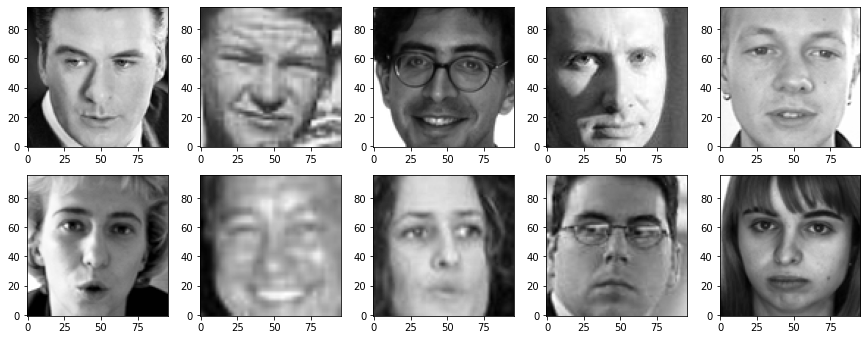

In [ ]:
## Print the first 10 images in mini_train_data.

# Create new figure.
fig = plt.figure(figsize=(15,15))

for i in range(0,10):
  plt.subplot(5,5,i+11)
  face = mini_train_data[i].reshape(96,96) # Reshape face pixels.
  plt.imshow(face[::-1], cmap = 'gray', origin='lower') # Add face to figure.

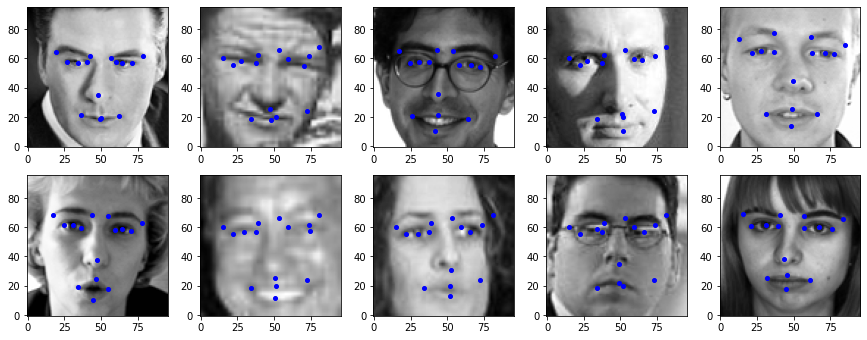

In [ ]:
## Print the first 10 images in mini_train_data with keypoints plotted.

def get_image_and_dots(index, 
                       image_ar, 
                       keypoints_ar=np.array([]), 
                       predictions_ar=np.array([])):
  """
  Purpose: Prints an image and keypoints from feature, label and prediction 
  arrays using an index. Label and prediction printing hard-coded to print from 
  all 30 keypoints available. Prediction printing is optional.

  Output: l: a face image with label and predicted keypoints plotted.
  """
  face = np.reshape(image_ar[index], (96, 96)) # Reshape face pixels.
  image = plt.imshow(face[::-1], cmap='gray', origin='lower') # Make face image.

  l = []
  l2 = []
  # Append label keypoints for each face.
  for i in range(1,31,2):
    if len(keypoints_ar) > 0:
      l.append(plt.plot(keypoints_ar[index][i-1], 
                        96-keypoints_ar[index][i], 
                        'bo', markersize=4))

    if len(predictions_ar) > 0:
      # Append prediction predictions for each face.
      l2.append(plt.plot(predictions_ar[index][i-1], 
                         96-predictions_ar[index][i],
                         marker="o", 
                         markersize=4, 
                         markeredgecolor = "r", 
                         fillstyle=None, 
                         color = 'r'))  
  return l, l2

# Create new figure.
fig = plt.figure(figsize=(15,15))

# Plot faces.
for i in range(10):
  plt.subplot(5,5,i+11)
  get_image_and_dots(i, mini_train_data, keypoints_ar=mini_train_labels)
plt.show()


## Section 6. Train a Baseline CNN.

*CNN referenced from [Python Machine Learning by Example, Chp 12](https://learning.oreilly.com/library/view/python-machine-learning/9781800209718/Text/Chapter_12.xhtml#_idParaDest-269) for MNIST Fashion Data Classification.*

1. Import model dependencies.
2. Build the CNN Model. 
3. Compile and Fit Model.
4. Evaluate Model on Dev Data.
5. Evaluate Model on Test Data.
6. Generate & plot predictions for Final Test Data! *(This is for the Kaggle Submission)*
7. Save CNN Model.

#### Training Conditions

- Train for 50 epochs, batch size of 128.
- Train on `train_data`, `train_labels` (# of examples = 5900)
- Test on `dev_data` (# of examples = 100)

#### Results/Model Performance
- On `test_data`: loss = 9.8437, mae = 2.1557, accuracy = 0.6139, RMSE = 3.1375
- On `dev_data`: loss = 10.0691, mae = 2.3159, accuracy = 0.62, RMSE = 3.1732

#### Loss Function
- Using Mean Squared Error (MSE) rather than Root Mean Squared Error (RMSE). MSE is commonly used by the kaggle competition. 
- Evaluation metrics: mean absolute error, accuracy & RMSE.

#### Saving the Model

Load model back in like so:

```python
new_model = tf.keras.models.load_model('./model_128-50_CNNfashion_train_data.hdf5')

test_loss2, mae2, test_acc2, test_rmse2 = new_model.evaluate(test_data, test_labels, verbose=2)
print('Loaded Model: Mean Absolute Error on test set:', mae2)
print('Loaded Model: Accuracy on test set:', test_acc2)
print('Loaded Model: RMSE on test set:', test_rmse2)
```
*Note: that loading in a model fully **requires** you to use the same optimizer, loss, compiler that was in the model. Evaluation and further fitting will only compute as if you compiled with the original optimizer, loss, metrics.*


In [ ]:
## 1. Import model dependencies.

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses

# Set seed so results are reproducable.
tf.random.set_seed(42)

In [ ]:
from keras.layers import Conv2D,Dropout,Dense,Flatten
from keras.models import Sequential

from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

from keras.metrics import RootMeanSquaredError

In [ ]:
## 2. Build the CNN Model. 

cnn = models.Sequential()

# Add 3 convolutional layers to model.
# Layer 1.
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)))
cnn.add(layers.MaxPooling2D((2, 2)))

# Layer 2.
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))

# Layer 3. 
cnn.add(layers.Conv2D(128, (3, 3), activation='relu'))

# Flatten filter maps to input into classifier backend.
cnn.add(layers.Flatten())

# Create one hidden layer in the classifier backend.
cnn.add(layers.Dense(64, activation='relu'))

# Add final output layer.
cnn.add(Dropout(0.1))
cnn.add(Dense(30))

# Produce model summary.
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [ ]:
## 3. Compile and Fit Model.

cnn.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae', 'accuracy', RootMeanSquaredError()])

# Fit mini CNN model.
# cnn.fit(mini_train_data, mini_train_labels, 
#         epochs = 5, batch_size = 128, 
#         validation_data=(test_data, test_labels))

# Fit REAL CNN model.
cnn.fit(train_data, train_labels, 
        epochs = 50, batch_size = 128, 
        validation_data=(test_data, test_labels))


Epoch 1/50
47/47 [==============================] - 20s 404ms/step - loss: 840.9367 - mae: 21.9891 - accuracy: 0.0532 - root_mean_squared_error: 28.9989 - val_loss: 36.5815 - val_mae: 4.4818 - val_accuracy: 0.0000e+00 - val_root_mean_squared_error: 6.0483
Epoch 2/50
47/47 [==============================] - 26s 552ms/step - loss: 182.0823 - mae: 9.8355 - accuracy: 0.2347 - root_mean_squared_error: 13.4938 - val_loss: 19.1526 - val_mae: 3.2109 - val_accuracy: 0.3651 - val_root_mean_squared_error: 4.3764
Epoch 3/50
47/47 [==============================] - 21s 447ms/step - loss: 131.1324 - mae: 8.4036 - accuracy: 0.2714 - root_mean_squared_error: 11.4513 - val_loss: 43.6252 - val_mae: 5.5696 - val_accuracy: 0.6158 - val_root_mean_squared_error: 6.6049
Epoch 4/50
47/47 [==============================] - 23s 491ms/step - loss: 107.3407 - mae: 7.6603 - accuracy: 0.2936 - root_mean_squared_error: 10.3605 - val_loss: 10.6463 - val_mae: 2.1144 - val_accuracy: 0.6158 - val_root_mean_squared_error

Epoch 34/50
47/47 [==============================] - 28s 599ms/step - loss: 31.0491 - mae: 4.1061 - accuracy: 0.4573 - root_mean_squared_error: 5.5722 - val_loss: 9.8181 - val_mae: 2.1264 - val_accuracy: 0.6177 - val_root_mean_squared_error: 3.1334
Epoch 35/50
47/47 [==============================] - 22s 453ms/step - loss: 30.5790 - mae: 4.0841 - accuracy: 0.4351 - root_mean_squared_error: 5.5298 - val_loss: 9.7807 - val_mae: 2.0759 - val_accuracy: 0.6130 - val_root_mean_squared_error: 3.1274
Epoch 36/50
47/47 [==============================] - 24s 506ms/step - loss: 30.1082 - mae: 4.0537 - accuracy: 0.4351 - root_mean_squared_error: 5.4871 - val_loss: 9.1452 - val_mae: 1.9915 - val_accuracy: 0.6072 - val_root_mean_squared_error: 3.0241
Epoch 37/50
47/47 [==============================] - 26s 562ms/step - loss: 28.5677 - mae: 3.9263 - accuracy: 0.4459 - root_mean_squared_error: 5.3449 - val_loss: 8.4144 - val_mae: 1.7991 - val_accuracy: 0.6111 - val_root_mean_squared_error: 2.9008
Epoc

4/4 - 0s - loss: 10.0691 - mae: 2.3159 - accuracy: 0.6200 - root_mean_squared_error: 3.1732
Model Evalutation on Dev Data.
Mean Absolute Error on Dev Data: 2.316
Accuracy on Dev Data: 0.620
Root Mean Squared Error on Dev Data: 3.173


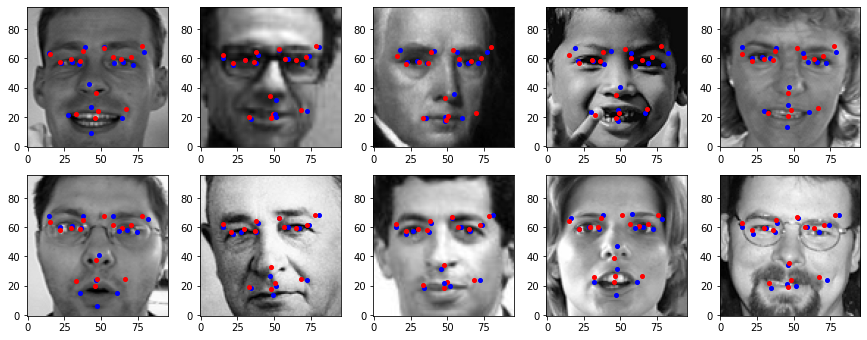

Note: Predicted points are red, and true labels are blue.


In [ ]:

## 4. Evaluate Model on Dev Data.

# Get scores.
dev_loss, dev_mae, dev_acc, dev_rmse = cnn.evaluate(dev_data, 
                                                    dev_labels, 
                                                    verbose=2)
print("Model Evalutation on Dev Data.")
print("Mean Absolute Error on Dev Data: %.3f"% (dev_mae))
print("Accuracy on Dev Data: %.3f"% (dev_acc))
print("Root Mean Squared Error on Dev Data: %.3f"% dev_rmse)

# Generate predictions.
dev_predictions = cnn.predict(dev_data)

# Create new figure.
fig = plt.figure(figsize=(15,15))

# Plot images and true & predicted keypoints.
for i in range(10):
  plt.subplot(5,5,i+11)
  get_image_and_dots(i, dev_data, 
                     keypoints_ar=dev_labels, 
                     predictions_ar=dev_predictions)
plt.show()
print("Note: Predicted points are red, and true labels are blue.")

33/33 - 1s - loss: 9.8437 - mae: 2.1557 - accuracy: 0.6139 - root_mean_squared_error: 3.1375

Model Evalutation on Test Data.
Mean Absolute Error on Test Data: 2.156
Accuracy on Test Data: 0.614
Root Mean Squared Error on Test Data: 3.137


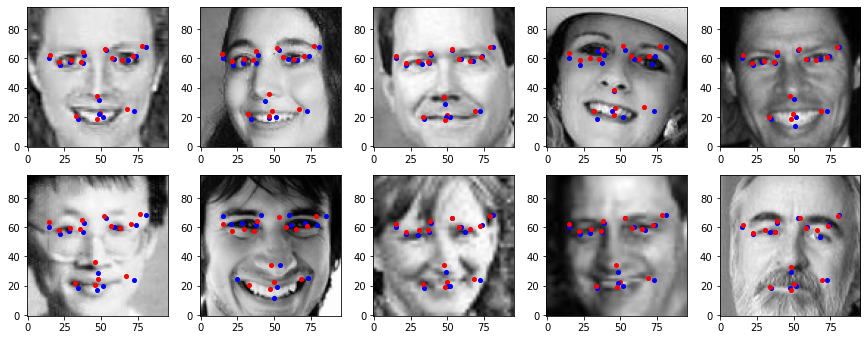

Note: Predicted points are red, and true labels are blue.


In [ ]:
## 5. Evaluate Model on Test Data.

# Get scores.
test_loss, test_mae, test_acc, test_rmse = cnn.evaluate(test_data, test_labels, verbose=2)
print("\nModel Evalutation on Test Data.")
print("Mean Absolute Error on Test Data: %.3f"% (test_mae))
print("Accuracy on Test Data: %.3f"% (test_acc))
print("Root Mean Squared Error on Test Data: %.3f"% (test_rmse))

# Generate predictions.
test_predictions = cnn.predict(test_data)

# Create new figure.
fig = plt.figure(figsize=(15,15))

# Plot images and true & predicted keypoints.
for i in range(10):
  plt.subplot(5,5,i+11)
  get_image_and_dots(i, test_data, 
                     keypoints_ar=test_labels, 
                     predictions_ar=test_predictions)
plt.show()
print("Note: Predicted points are red, and true labels are blue.")

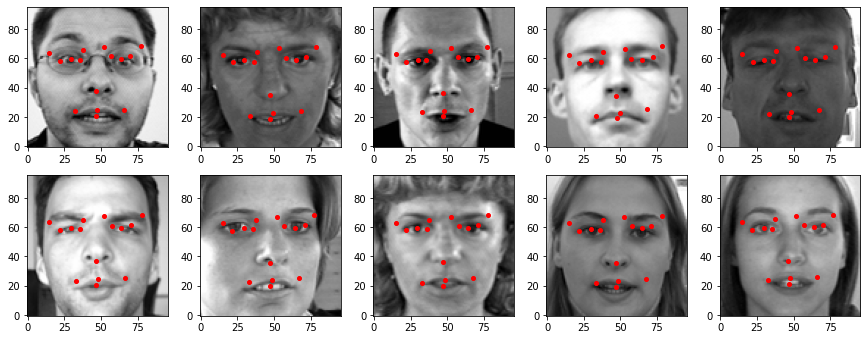

Note: Predicted points are red, and true labels are blue.


In [ ]:
## 6. Generate & plot predictions for Final Test Data!
#     These are for the Kaggle Submission

# Generate predictions.
final_predictions = cnn.predict(X_test_final)

# Create new figure.
fig = plt.figure(figsize=(15,15))

# Plot images and true & predicted keypoints.
for i in range(10):
  plt.subplot(5,5,i+11)
  get_image_and_dots(i, X_test_final, 
                     predictions_ar=final_predictions)
plt.show()
print("Note: Predicted points are red, and true labels are blue.")

In [ ]:
## 7. Save CNN Model.

# format: 'model_' + {batch size or SGD} + '-' + {# of epochs}_ + {architecture info} + {training data used in fitting}.hdf5
cnn.save('./model_128-50_CNNfashion_train_data2.hdf5')